# Statistics: The Science of Decisions Project Instructions
**Data Analyst Nanodegree P1: Test a Perceptual Phenomenon**

**Chana Greene**

## Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <font color='red'>RED</font>, <font color='blue'>BLUE</font>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <font color='green'>PURPLE</font>, <font color='purple'>ORANGE</font>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

## Questions For Investigation

As a general note, be sure to keep a record of any resources that you use or refer to in the creation of your project. You will need to report your sources as part of the project submission.

[Question 1](#Q1)

[Question 2](#Q2)

[Question 3](#Q3)

[Question 4](#Q4)

[Question 5](#Q5)

[Question 6](#Q6)

[List of Resources](#Resources)

## Answers

**<a id='Q1'></a>1. What is our independent variable? What is our dependent variable? **

>Independent variable - congruent vs incongruent words

>Dependent variable - time to name the ink color

**<a id='Q2'></a>2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.**

> $H_0$ (null) - there is not a significant difference in the mean time to name the ink color between the congruent and incongruent sets words: $\mu_c = \mu_i$

> $H_A$ (alt) - the mean time to name the ink color is statistically different for the incongruent word set than the congruent word set: $\mu_c \neq \mu_i$.

> Statistical Test - we should perform a dependent t-test for paired samples to determine whether or not to reject the null hypothesis since the alternative hypothesis is that the mean time to name the ink color will be higher for the incongruent word set.  We will use the p = 0.05 to determine significance.

Now it’s your chance to try out the Stroop task for yourself. Go to [this link](https://www.google.com/url?q=https://faculty.washington.edu/chudler/java/ready.html&sa=D&usg=AFQjCNFRXmkTGaTjMtk1Xh0SPh-RiaZerA), which has a Java-based applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) Now, download [this dataset](https://www.google.com/url?q=https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view?usp%3Dsharing&sa=D&usg=AFQjCNGAjbK9VYD5GsQ8c_iRT9zH9QdOVg) which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.

**<a id='Q3'></a>3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.**

In [22]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
%pylab inline

matplotlib.style.use('ggplot')

data_stroop = pd.read_csv('stroopdata.csv')
data_stroop['Diff'] = data_stroop.Congruent - data_stroop.Incongruent
print 'Number of observations:\n', data_stroop.count(),'\n'
print 'Series Mean:\n', data_stroop.mean().round(3),'\n'
print 'Series Median:\n',data_stroop.median().round(3),'\n'
print 'Standard Deviation:\n',data_stroop.std(ddof=0).round(3),'\n'
print 'Sample Standard Deviation:\n',data_stroop.std().round(3),'\n'

Populating the interactive namespace from numpy and matplotlib
Number of observations:
Congruent      24
Incongruent    24
Diff           24
dtype: int64 

Series Mean:
Congruent      14.051
Incongruent    22.016
Diff           -7.965
dtype: float64 

Series Median:
Congruent      14.356
Incongruent    21.018
Diff           -7.666
dtype: float64 

Standard Deviation:
Congruent      3.484
Incongruent    4.696
Diff           4.762
dtype: float64 

Sample Standard Deviation:
Congruent      3.559
Incongruent    4.797
Diff           4.865
dtype: float64 



The mean, median, mode(s) and standard deviation for the Congruent set, Incongruent set and their difference are in the table below:

| Series | Mean | Median | Mode | Standard Deviation |
|--------|------|--------|------|--------------------|
|Congruent| 14.051|14.356|14-16 | 3.559|
|Incongruent|22.016|21.018|20-23|4.797|
|Difference|-7.965|-7.666|-2-(-4) & -10-(-12)|4.865|

_Note_: We use the sample standard deviation because this data set represents a sampling of the population.

**<a id='Q4'></a>4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.**

Histograms of the Congruent & Incongruent sets as well as their difference:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115cd9e90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1161f0910>]], dtype=object)

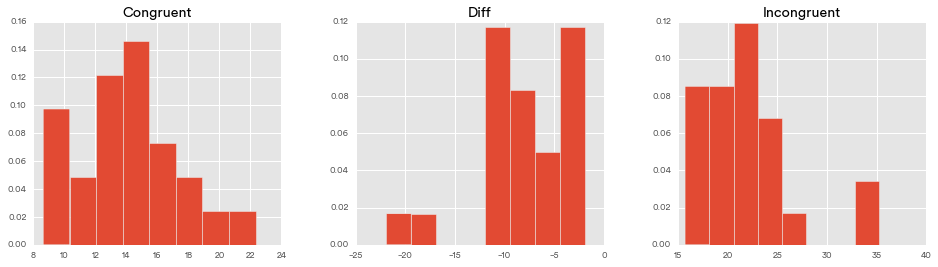

In [14]:
data_stroop.hist(bins=8, normed=True, layout=(1,3), figsize=(16,4))

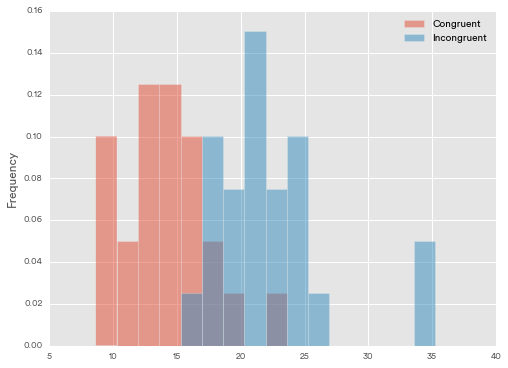

In [15]:
data_stroop[['Congruent','Incongruent']].plot(kind='hist',bins=16,normed=True,alpha=0.5,figsize=(8,6))

In [16]:
data_stroop_norm = (data_stroop - data_stroop.mean())/data_stroop.std()

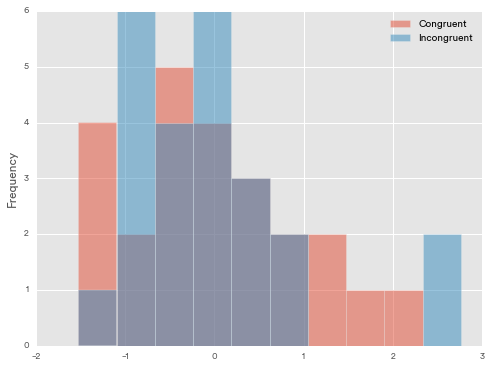

In [17]:
data_stroop_norm[['Congruent','Incongruent']].plot(kind='hist',bins=10,alpha=0.5,figsize=(8,6))

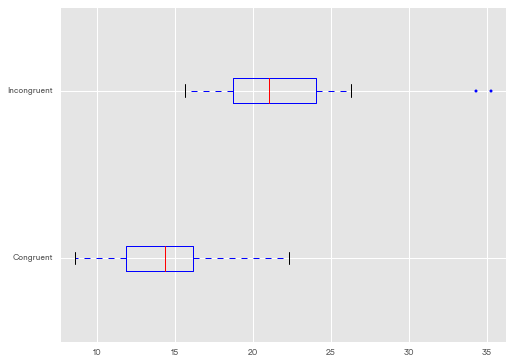

In [18]:
#plt.scatter(x=data_stroop['Congruent'],y=data_stroop['Incongruent'])
data_stroop[['Congruent','Incongruent']].plot(kind='box',vert=False,sym='.',figsize=(8,6),
                                              xlim=(min(data_stroop['Congruent'])-1,max(data_stroop['Incongruent'])+1))

The distributions of the Congruent set and Incongruent set are roughly gaussian with a little overlap in their right and left tails respectively and the Congruent set is just slightly positively skewed.  This can also be seen in the box and wisker plots where the inner quartile range does not overlap for the two distributions but the median of the Incongruent set is just within the maximum of the Congruent set.  There are also two outliers from the Incongruent set.

**<a id='Q5'></a>5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?**

Since we are working with paired samples (each subject performed the task with the congruent and incongruent sets) we will perform the Dependent t-test for paired samples.

$$
t = \frac{\mu_c-\mu_i}{\frac{S_D}{\sqrt{n}}}
$$

where,

$S_D$ = standard error of the differences between samples

$\mu_c$ = the mean of the congruent set sample

$\mu_i$ = the mean of the incongruent set sample

$n$ = the number of observations in each sample = 24

For a confidence level of 95% (or p = 0.025 for a two-tailed test) and degrees of freedom = $n-1$ = 23 our critical statistic is $t_c = \pm 2.069$


In [32]:
# Manually calculating the t value
#t = data_stroop.mean()['Diff']/(data_stroop.std()['Diff']/np.sqrt(data_stroop.count()['Diff']))

# Alternative method for calculating the t value with the scipy pkg
# Also returns the p-value
t = stats.ttest_rel(data_stroop.Congruent,data_stroop.Incongruent)

print 't = ' + str(t[0].round(2)) + '\n'
print 'p = ' + str(t[1])

t = -8.02

p = 4.10300058571e-08


After calculating the t-value we can reject the null hypothesis with a 95% confidence.  In fact, since $t = -8.02$ corresponds to $p = 4.10 x 10^{-8}$ we can actually reject the null hypothesis with a greater than 99.9% confidence.

This means there is a statistical difference between the time to say the ink color between the congruent set and the incongruent set, or that there is less than a 0.1% chance that the two samples come from the same population (as represented by the mean time to say the ink color).  This matches expectations since descriptively and visually the two distributions looked different, however, without the t-test I would not have been able to predict the level of confidence.

**<a id='Q6'></a>6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!**

One hypothesis is that we automatically associate a color with the written word such that when working with the congruent set our initial association is reinforced and enables us to complete the task faster, while the incongruent set requires us to confront this association and re-think our gut response making us go slower.  Some variants that have been performed before also included neutral sets (names of color written in black ink or squares of color) where you are only processing one type of information (words or color).  It suggests that we are also faster at procesing written information than color, but I wonder if this would be true for a nacent reader.  It would be interesting to perform the experiment on a group of kindergartners to see if the same effect is exhibited.

## <a id='Resources'></a>List of Resources

1. Pandas Documentation: http://pandas.pydata.org/pandas-docs/stable/index.html
2. t-table: https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg
3. Stroop effect Wikipedia page: https://en.wikipedia.org/wiki/Stroop_effect